In [2]:
import pandas as pd

# Load the CSV dataset into a Pandas DataFrame
raw_data = pd.read_csv('C:/Users/HP/Downloads/C.T.A. Data Analysis Bootcamp 2.0/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows to inspect the data
print(raw_data.head())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = raw_data.duplicated().sum()
print("Duplicate Rows:", duplicates)

# Use descriptive statistics to identify outliers
print("Descriptive Statistics:\n", raw_data.describe())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Duplicate Rows: 0
Descriptive Statistics:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [17]:
# Perform one-hot encoding
encoded_data = pd.get_dummies(raw_data, columns=['PaymentMethod'])


In [8]:
# Calculate summary statistics
summary_stats = encoded_data.describe()
print(summary_stats)


       SeniorCitizen       tenure  MonthlyCharges  gender_Female  gender_Male
count    7043.000000  7043.000000     7043.000000    7043.000000  7043.000000
mean        0.162147    32.371149       64.761692       0.495244     0.504756
std         0.368612    24.559481       30.090047       0.500013     0.500013
min         0.000000     0.000000       18.250000       0.000000     0.000000
25%         0.000000     9.000000       35.500000       0.000000     0.000000
50%         0.000000    29.000000       70.350000       0.000000     1.000000
75%         0.000000    55.000000       89.850000       1.000000     1.000000
max         1.000000    72.000000      118.750000       1.000000     1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



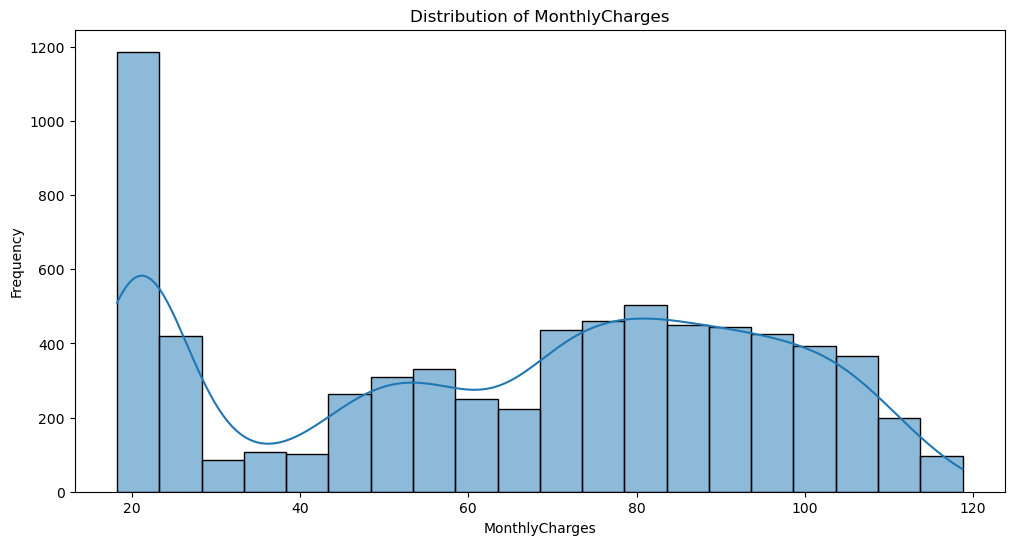

In [12]:
# Create histograms for numeric variables
plt.figure(figsize=(12, 6))
sns.histplot(data=encoded_data, x='MonthlyCharges', bins=20, kde=True)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()




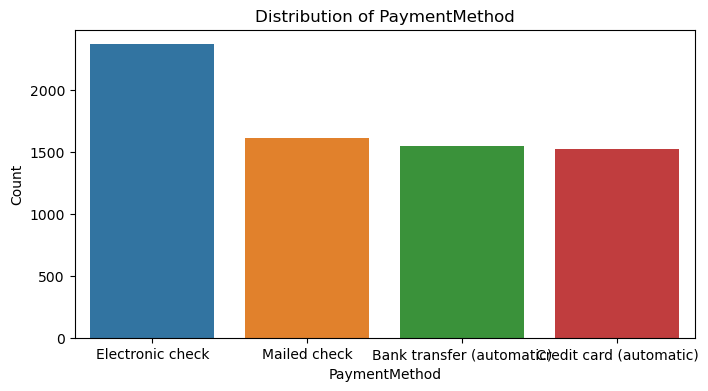

In [14]:
# Create bar plots for categorical variables
plt.figure(figsize=(8, 4))
sns.countplot(data=encoded_data, x='PaymentMethod')
plt.title('Distribution of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.show()

In [49]:
# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

correlation_matrix


C:\Users\HP\AppData\Local\Temp\ipykernel_10156\1744962448.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encoded_data.corr()


,SeniorCitizen,tenure,MonthlyCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.042812,0.030550,0.271625,-0.377437
PaymentMethod_Bank transfer (automatic),-0.016159,0.243510,0.042812,1.000000,-0.278215,-0.376762,-0.288685
PaymentMethod_Credit card (automatic),-0.024135,0.233006,0.030550,-0.278215,1.000000,-0.373322,-0.286049
PaymentMethod_Electronic check,0.171718,-0.208363,0.271625,-0.376762,-0.373322,1.000000,-0.387372
PaymentMethod_Mailed check,-0.153477,-0.233852,-0.377437,-0.288685,-0.286049,-0.387372,1.000000


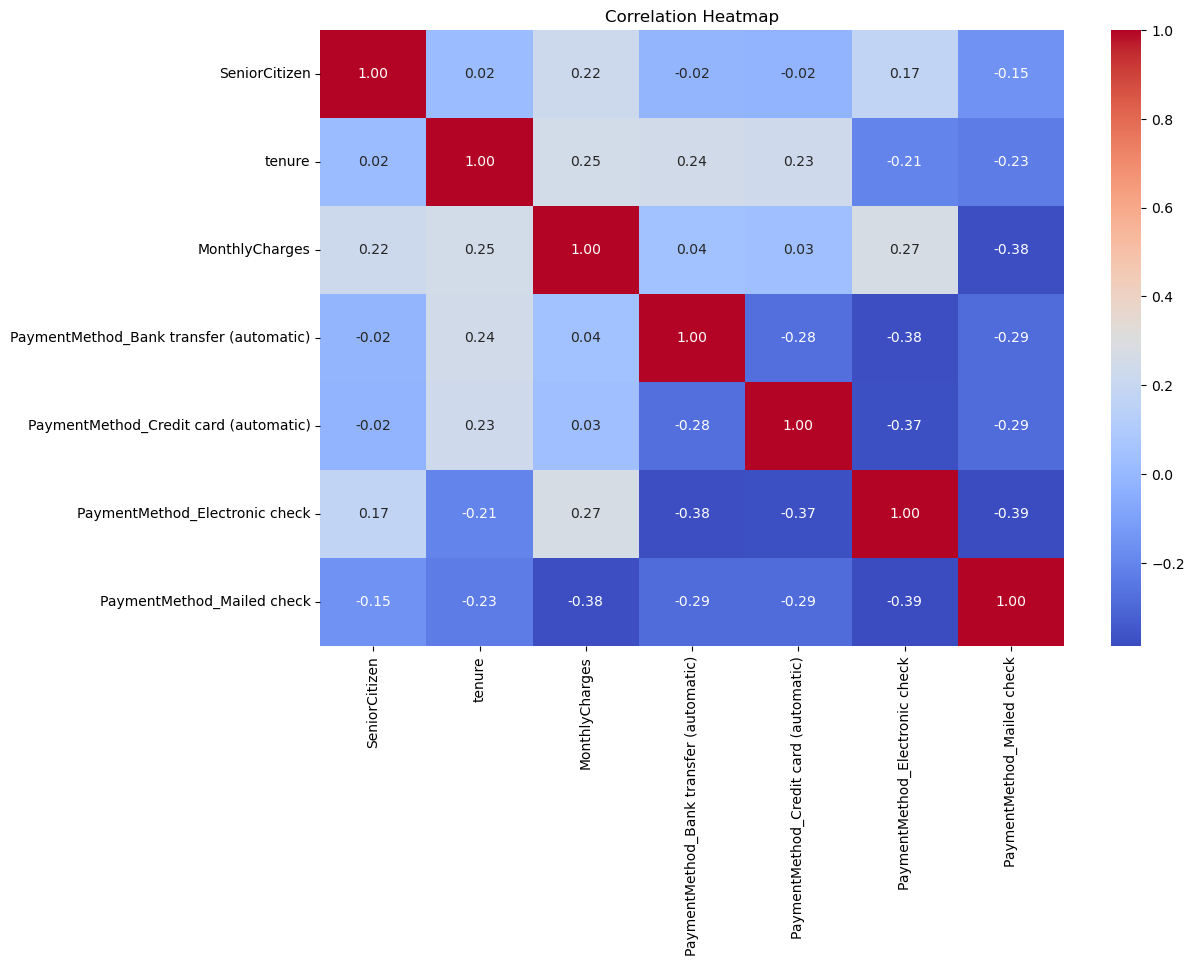

In [20]:
# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Subset for churned customers (True responses)
churned_subset = raw_data[raw_data['Churn'] == True]

# Subset for non-churned customers (False responses)
non_churned_subset = raw_data[raw_data['Churn'] == False]

In [27]:
from scipy.stats import ttest_ind

# Hypothesis test for monthly charges between churned and non-churned customers
t_statistic, p_value = ttest_ind(churned_subset['MonthlyCharges'], non_churned_subset['MonthlyCharges'])

# Print the test results
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

T-statistic: nan, p-value: nan


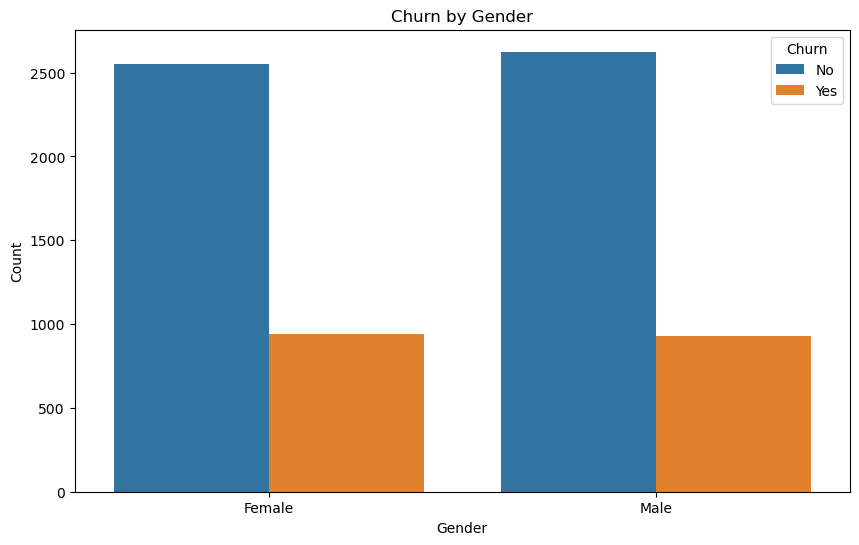

In [37]:

# Create a bar plot to compare churn by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=encoded_data, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


# The number of males and females who churned out and those who did not churn of the company are identical. 

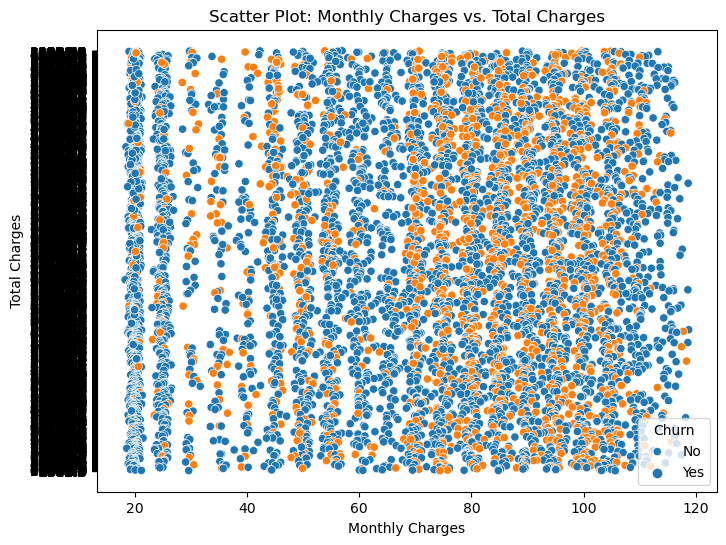

In [45]:
# Scatter Plot between Monthly Charges and Total Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=encoded_data, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Scatter Plot: Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# There is a weak correlation between the monthly charges and total charges of customers

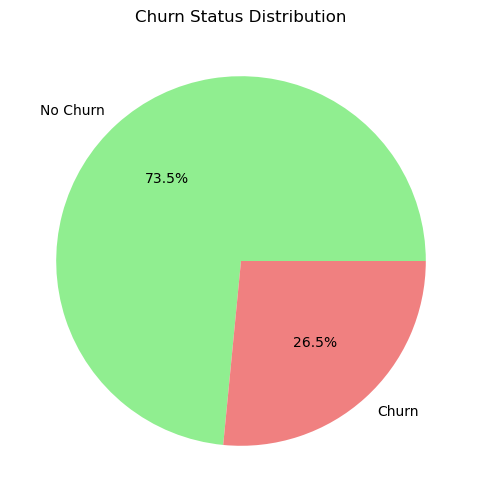

In [46]:
# Pie Chart of Churn Status
churn_counts = encoded_data['Churn'].value_counts()
labels = ['No Churn', 'Churn']
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Churn Status Distribution')
plt.show()

# Only 26.5% of customers churned the company. It is quite telling that majority of the customers of the telecom company have judged it beneficial to them to still remain with the company. 